Introduction

The relationship between height and weight is a fundamental aspect of human biology and health. Understanding how these two variables correlate can provide insights into various aspects of health, including growth patterns, nutritional status, and the risk of developing certain health conditions. This project aims to analyze the relationship between height and weight using statistical and machine learning techniques to develop predictive models. These models can estimate weight based on height, providing valuable tools for health professionals and researchers.


Real-World Implementation

In real-world scenarios, understanding the height-weight relationship is crucial for several domains:

Healthcare: Physicians use height and weight measurements to calculate Body Mass Index (BMI), which is a key indicator of obesity and undernutrition. Accurate prediction models can help in assessing growth in children, diagnosing health conditions, and tailoring personalized healthcare plans.

Nutrition: Dietitians use height and weight to develop individualized diet plans. Predictive models can aid in recommending caloric intake and nutritional requirements based on an individual's height.

Fitness and Wellness: Fitness professionals utilize height and weight data to create customized fitness programs. Predictive tools can enhance these programs by providing more precise assessments of an individual's health and fitness needs.

## import libraries

In [1]:
#importing eda libraries
import numpy as np  #math
import pandas as pd #excellent for data manuplation

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing 
from sklearn.preprocessing import StandardScaler

#spliting the data
from sklearn.model_selection import train_test_split

# importing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#evalution matrics
from sklearn.metrics import mean_squared_error


## read the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\height and weight\SOCR-HeightWeight.csv')

In [4]:
df.head() 

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
#converting weight pounds to kg
df['Weight_kg']=df['Weight(Pounds)']*0.453592  

# Convert inches to the desired format (feet.inches) 
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10

In [6]:
df.describe()

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [7]:
drop_col=['Index','Height(Inches)','Weight(Pounds)'] # selecting columns to del it

#droping columns
df=df.drop(columns=drop_col,axis=1)

In [8]:
df.sample(3) #it will give random row information

,Weight_kg,Height(Feet.Inches)
2510,52.190205,5.604605
8622,57.753284,5.663706
21076,56.903434,5.804198


In [9]:
df.shape  #checking shape of the data

(25000, 2)

In [10]:
df.isna().any() #checking null values

Weight_kg              False
Height(Feet.Inches)    False
dtype: bool

In [11]:
df.dtypes #checking dtypes for our dataframe

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [12]:
df.corr() #correlation

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [13]:
df.describe()  

,Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


Mean:

The mean height is approximately 67.99 inches.
The mean weight is approximately 127.08 pounds.
Standard Deviation (Std):

The standard deviation for height is approximately 1.90 inches, indicating the spread or dispersion of heights around the mean.
The standard deviation for weight is approximately 11.66 pounds, indicating the spread or dispersion of weights around the mean.
Minimum and Maximum Values:

The minimum height recorded is approximately 60.28 inches, and the maximum height is approximately 75.15 inches.
The minimum weight recorded is approximately 78.01 pounds, and the maximum weight is approximately 170.92 pounds.
Percentiles (25th, 50th, and 75th):

The 25th percentile (Q1) indicates that 25% of the data falls below a height of approximately 66.70 inches and a weight of approximately 119.31 pounds.
The 50th percentile (median) indicates that 50% of the data falls below a height of approximately 67.99 inches and a weight of approximately 127.16 pounds.
The 75th percentile (Q3) indicates that 75% of the data falls below a height of approximately 69.27 inches and a weight of approximately 134.89 pounds.

## checking outliers using boxplot

<Axes: xlabel='Height(Feet.Inches)'>

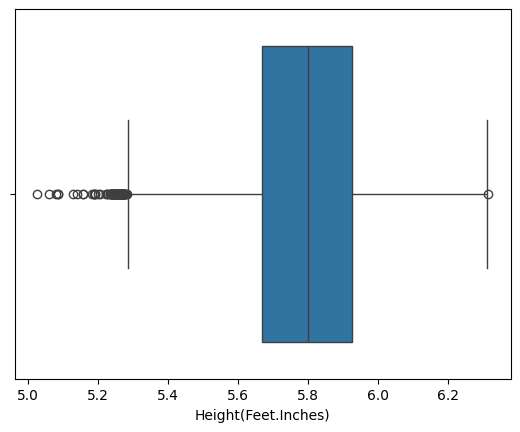

In [14]:
sns.boxplot(x=df['Height(Feet.Inches)'])

<Axes: xlabel='Weight_kg'>

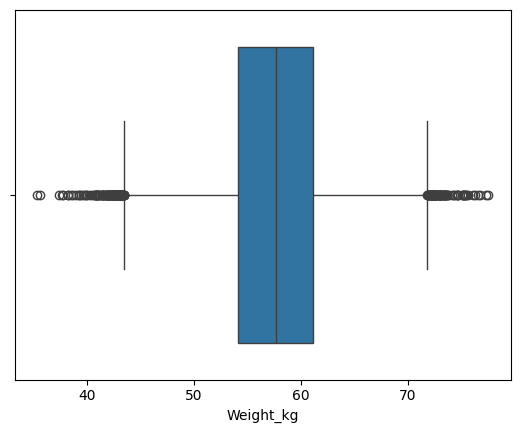

In [15]:
sns.boxplot(x=df['Weight_kg']) #checking outliers for 

A correlation coefficient of 0.502859 suggests a moderate positive correlation between height and weight

## scatterplot

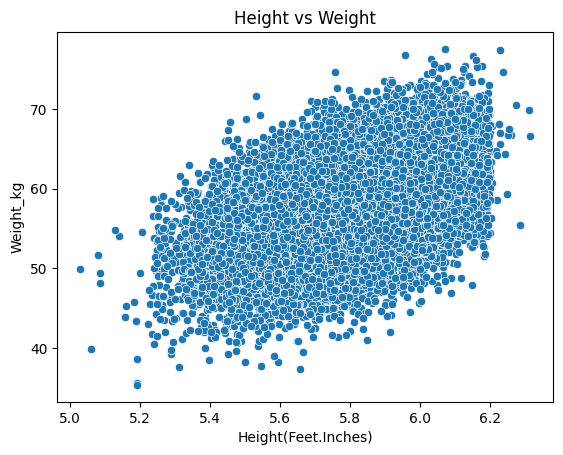

In [16]:
x=df['Height(Feet.Inches)']
y=df['Weight_kg']

sns.scatterplot(x=x,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight_kg')
plt.show()

In [17]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
24674,52.494656,5.715888
8075,58.846305,5.646411
8496,69.553344,5.750367


## split the data into dependent & independent variable 

In [18]:
X=df.iloc[:,1]
y=df.iloc[:,0]

In [19]:
X

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [20]:
y

0        51.252494
1        61.909547
2        69.411778
3        64.562199
4        65.452010
           ...    
24995    53.538008
24996    54.518674
24997    53.644285
24998    59.995797
24999    56.641938
Name: Weight_kg, Length: 25000, dtype: float64

In [21]:
df.columns[1] #X variable column name

'Height(Feet.Inches)'

In [22]:
df.columns[0] # y variable

'Weight_kg'

## Data scaling(preprocessing data)

In [23]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X.values.reshape(-1,1))


scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

## spit the train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print('Shape of trining data')
print(X_train.shape)
print(y_train.shape)

print('Shpae of testing data')
print(X_test.shape)
print(y_test.shape)

Shape of trining data
(20000,)
(20000,)
Shpae of testing data
(5000,)
(5000,)


## linear regression model

In [28]:
#linear regression model X should be 2d array so we are reshaping it to 2d array

# Reshape training data
X_train_2d = X_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

# Reshape testing data
X_test_2d = X_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

print("Shape of training data (X):", X_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", X_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


In [29]:
lr=LinearRegression() #linear Regression
lr

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
lr.fit(X_train_2d,y_train_2d)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## predictions

In [31]:
y_pred=lr.predict(X_test_2d)
y_pred[:10]

array([[55.94425481],
       [60.91226889],
       [56.56867714],
       [56.42643564],
       [51.52547113],
       [52.93798976],
       [60.30463034],
       [60.27256006],
       [62.74472434],
       [63.0616341 ]])

In [32]:
y_test_2d[:10]

array([[60.87349789],
       [64.25661383],
       [50.63170805],
       [53.62895327],
       [46.5397639 ],
       [48.20970821],
       [55.81821505],
       [55.03481631],
       [76.60307055],
       [55.98708736]])

## mean_square_error

In [33]:
mean_squared_error(y_pred,y_test_2d)

21.69730652290755

## decission tree model

In [34]:
model_dtr=DecisionTreeRegressor()
model_dtr

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [35]:
model_dtr.fit(X_train_2d, y_train_2d)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [36]:
y_pred_dtr=model_dtr.predict(X_test_2d)
y_pred_dtr[:5]

array([63.37542065, 56.46639802, 56.7162365 , 64.71347169, 57.84078178])

In [37]:
mean_squared_error(y_pred_dtr,y_test_2d)

41.50751860513505

## random forest regressor model

In [38]:
model_rfr=RandomForestRegressor()
model_rfr.fit(X_train_2d,y_train_2d)

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [39]:
y_pred_rfr=(X_test_2d)
y_pred_rfr[:10]

array([[5.675233],
       [6.023626],
       [5.719022],
       [5.709047],
       [5.365356],
       [5.464412],
       [5.981014],
       [5.978765],
       [6.152131],
       [6.174355]])

In [40]:
mean_squared_error(y_pred_rfr,y_test_2d)

2708.30376658499

## hyperparameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Linear Regression model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_2d, y_train_2d)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -20.836260216566206


## cross validation score

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, X_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)

MSE Scores: [21.65411512 21.79844701 20.33072238 21.2128048  21.84713487 20.47547042
 20.38317103 20.4544885  21.45193422 18.76081422]


## final model

In [43]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression(fit_intercept=False, copy_X=True)

# Fit the model to the entire training data
final_model.fit(X_train_2d, y_train_2d)

# Now you can use final_model to make predictions on new data

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",False
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## save to pickle file

In [44]:
import pickle

# Define the filename for the pickle file
filename = 'final_model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)


## future prediction 

In [ ]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])


Predicted weight: 59.7202378537033
